<a href="https://colab.research.google.com/github/BillTanekeu/TP-TPE-INF-3236-Groupe-8/blob/visualisation/Tp_Pr%C3%A9sentation_et_visualisation_des_donn%C3%A9es_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP: Présentation et visualisation des données avec Python


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 

la bibiothèque Numpy offre des structures de données idéales
pour représenter les données et Matplotlib offre de grandes possibilités pour visualiser les données.


Dans ce qui suit, nous voulons montrer comment faire cela en utilisant les données du module sklearn .


##Données Iris du module sklear

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()



L'ensemble de données résultant est un objet Bunch





In [ ]:
type(iris)

sklearn.utils.Bunch


 Vous pouvez voir ce qui est disponible pour ce type de données en utilisant la méthode keys() :



In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])



---
Un objet Bunch est similaire à un dictionnaire


In [ ]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


Les caractéristiques de chaque fleur sont stockées dans l' attribut data de l'ensemble de données .

In [ ]:
n_samples, n_features = iris.data.shape 
print("Nombre d'échantillons", n_samples) 
print('Nombre de  features:', n_features)

Nombre d'échantillons 150
Nombre de  features: 4


Les caractéristiques de chaque fleur sont stockées dans l' attribut data de l'ensemble de données .

Les informations sur la classe de chaque échantillon

In [ ]:
print("Taille target:",iris.target.shape)

Taille target: (150,)


En utilisant la fonction bincount de NumPy ,nous pouvons voir que les classes de cet ensemble de données sont uniformément
réparties - il y a 50 fleurs de chaque espèce, avec:

*   classe 0 : Iris Setosa
*   classe 1 : Iris Versicolor
*   classe 2 : Iris Virginica

In [ ]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

## Visualisation des données iris

Histogramme de la largeur du pétal

/tmp/ipykernel_17447/402218583.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


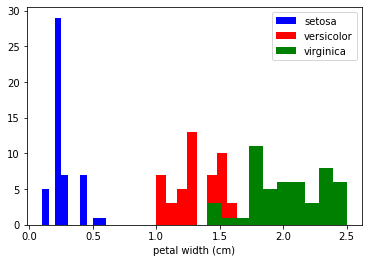

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_index = 3
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
  ax.hist(iris.data[iris.target==label, x_index],
  label=iris.target_names[label],
  color=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

Le diagramme d'apparence montre deux fonctions dans un diagramme.

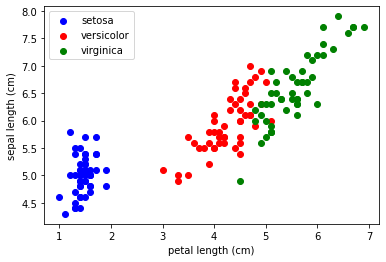

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_index = 2
y_index = 0
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
  ax.scatter(iris.data[iris.target==label, x_index],
    iris.data[iris.target==label, y_index],
    label=iris.target_names[label],
    c=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

Nous allons maintenant examiner toutes les combinaisons de fonctionnalités dans un diagramme combiné:

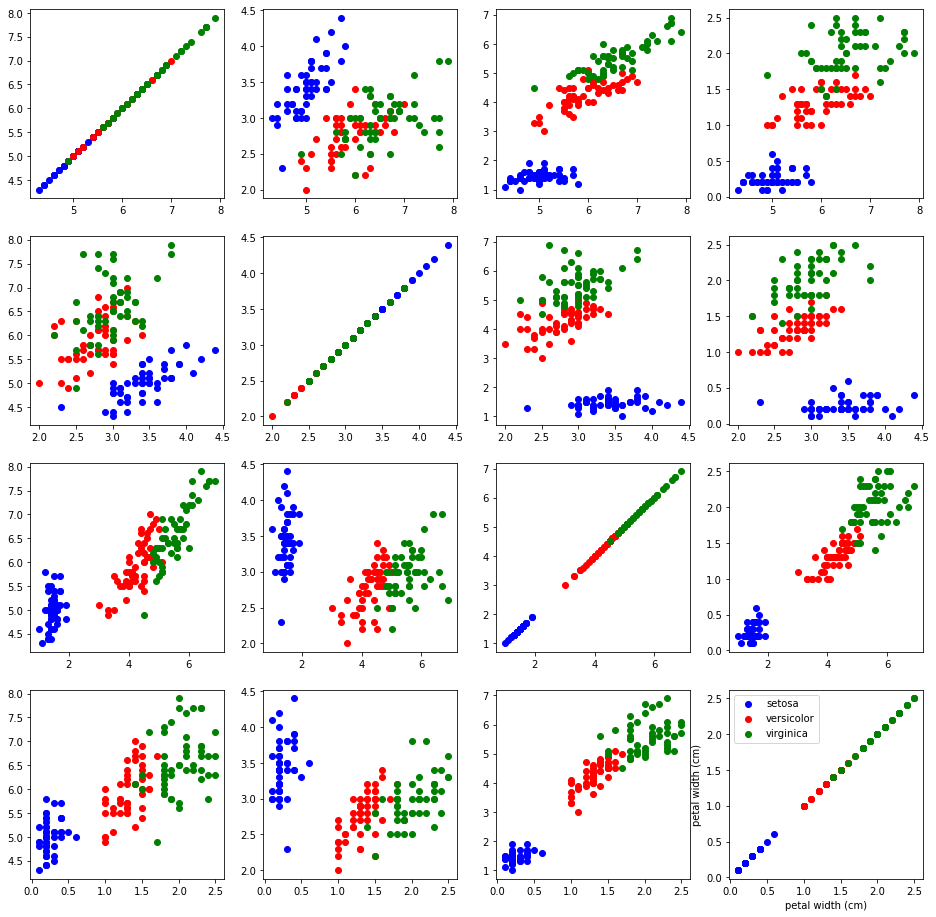

In [ ]:
import matplotlib.pyplot as plt
n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green']
for x in range(n):
  for y in range(n):
    xname = iris.feature_names[x]
    yname = iris.feature_names[y]
    for color_ind in range(len(iris.target_names)):
      ax[x, y].scatter(iris.data[iris.target==color_ind,
      x],
        iris.data[iris.target==color_ind, y],
        label=iris.target_names[color_ind],
        c=colors[color_ind])
ax[x, y].set_xlabel(xname)
ax[x, y].set_ylabel(yname)
ax[x, y].legend(loc='upper left')
plt.show()

Au lieu de le faire manuellement, nous pouvons également utiliser la matrice de nuages de points fournie par le module pandas.

Les matrices de nuages de points affichent des nuages de points entre toutes les entités de l'ensemble de données, ainsi que des histogrammes pour
montrer la distribution de chaque entité.

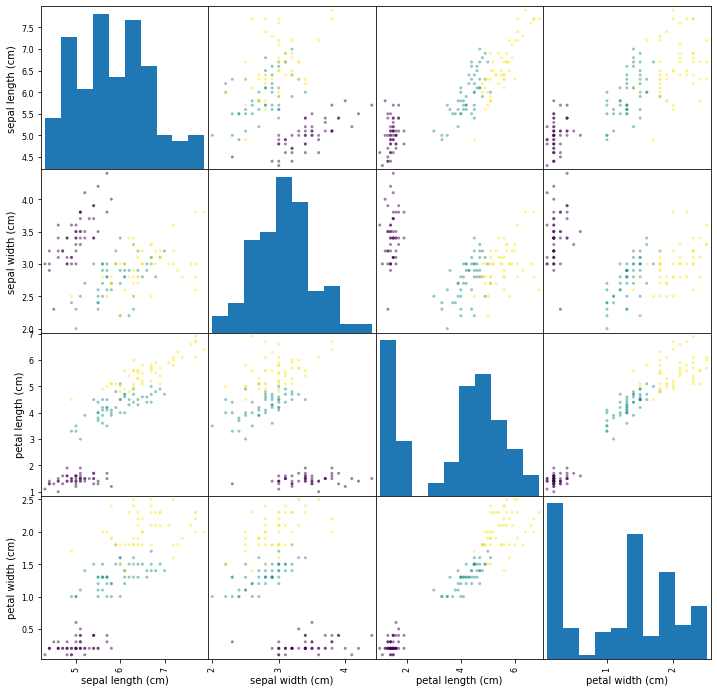

In [ ]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df,
  c=iris.target,
  figsize=(12, 12)
);

##VISUALISATION EN 3 DIMENSIONS

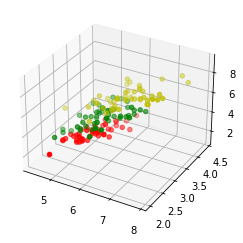

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = []
for iclass in range(3):
  X.append([[], [], []])
  for i in range(len(iris.data)):
    if iris.target[i] == iclass:
      X[iclass][0].append(iris.data[i][0])
      X[iclass][1].append(iris.data[i][1])
      X[iclass][2].append(sum(iris.data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
  ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [28]:
from sklearn.datasets import load_wine # importation du jeu de données wine à partir de scikit learn
wine = load_wine() # chargement du jeu de données wine

In [29]:
print(wine.DESCR)  # description complete du jeu de données wine

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
print(wine.target_names)# écriture des classes: nous avons 3 ici: class_0 , class_1 et class_2
print(wine.feature_names)  # ecriture des différentes variables descriptrives des enregistrements

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [30]:
data = wine.data   # stockage du dataset wine dans une variable appelée data
labelled_data = wine.target   # stockage des classes du wine dataset dans une variable nommée labelled_data

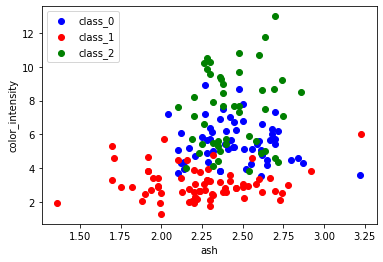

In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt # importation du module matplotlib
wine = datasets.load_wine()   # chargement de wine
features = 'ash', 'color_intensity'  # enregistrement sous forme de ash avec une couleur brillante sur le graphe
features_index = [wine.feature_names.index(features[0]),
wine.feature_names.index(features[1])]
colors = ['blue', 'red', 'green']  # couleurs à utiliser
for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]],
    wine.data[wine.target==label, features_index[1]],
    label=wine.target_names[label],
    c=color) # boucle qui définit chaque enregistrement comme un point et lui donne une couleur en 
    # fonction de sa classe tout en definissant les deux premières variables comme constitutives du nuage
    # de points
plt.xlabel(features[0])  # axe des abcisses utilisé pour la première variable du dataset
plt.ylabel(features[1])  # axe des ordonnées utilisé pour la 2eme variable du dataset
plt.legend(loc='upper left')  # légende située en haut à gauche
plt.show()   # renvoi ou visualisation du graphe(nuage de point)